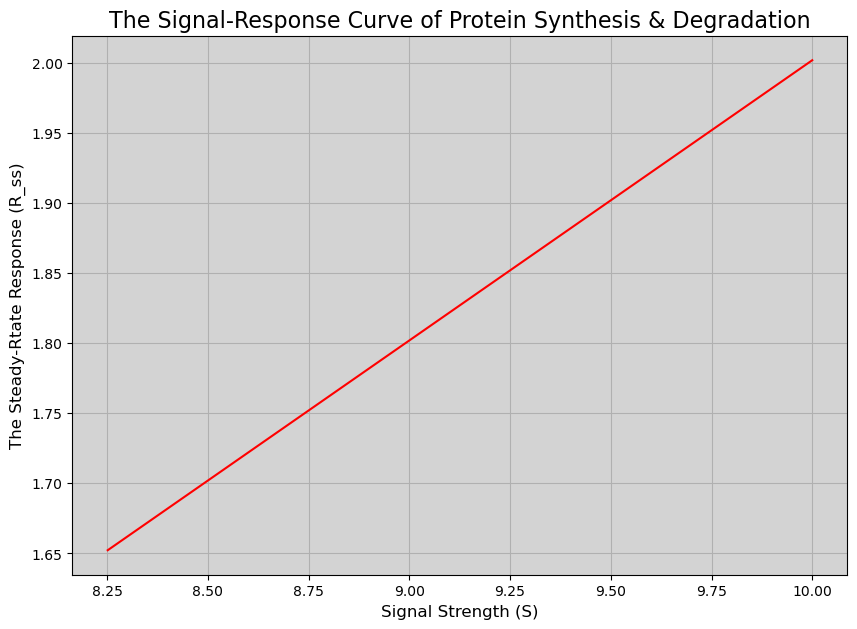

In [1]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

# Define the rate equation
# S <:::::::::> R , k1S - k2R, protein synthesis(S:mRNA concentration, R:protein concentration)
# R ----->   k0,  protein degradation
rate_eq = '''
    k0 = 0.01; k1 = 1; k2 = 5; S = 10; R = 0;
    S -> R; k1*S - k2*R;
    R => ; k0;
'''

model = te.loada(rate_eq)

model.reset() # resets the model to its default state

t_start = 0
t_end = 10
n_points = 100

rate_curve = model.simulate(start=t_start, end=t_end, points=n_points)

time = rate_curve[:, 0]    # change in time
S_conc = rate_curve[:, 1]   # change the signal concentration over the time                 
R_conc = rate_curve[:, 2]   # change the protein concentration over rhe time
"""                        
Rate = model.k0+(model.k1*S_conc) - (model.k2* R_conc) # the rate equation

plt.figure(figsize=(10, 7))
plt.plot(R_conc, Rate, color = 'red')
plt.xlabel('Response (Concentration of Protein)', fontsize=12)
plt.ylabel('Rate Equation(dR/dt)',fontsize=12)
plt.title('The Rate Curve of Protein Synthesis & Degradation', fontsize=16)
plt.grid(True)
plt.show()
"""


R_ss = (model.k0 + model.k1 * S_conc) / model.k2 # the steady-state solution of a differential equation

plt.figure(figsize=(10, 7))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.plot(S_conc, R_ss, color = 'red')
plt.xlabel('Signal Strength (S)', fontsize=12)
plt.ylabel('The Steady-Rtate Response (R_ss)', fontsize=12)
plt.title('The Signal-Response Curve of Protein Synthesis & Degradation', fontsize=16)
plt.grid(True)
plt.show()

model.exportToSBML('synthesis_&_degradation.xml')